In [1]:
import warnings  
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split as tts

# Datos


In [2]:
train = pd.read_csv('../csv/csv_limpios/train.csv')

In [3]:
train.head()

,Jugador,Pais,Posc,Equipo,Edad,Nacimiento,PJ,Titular,Min,Goles,Asistencias,Goles+Asistencias,Tarjetas Amarillas,Tarjetas Rojas,Goles Esperados,Asistencias Esperadas,Valor de mercado,jugador_id
0,Aaron Connolly,IRL,Delantero,Brighton,21,2000.00,15.0,8.00,735.00,1.666667,0.666667,2.333333,0.0,0.00,2.80,0.266667,"3,50 mill. €",0
1,Aaron Cresswell,ENG,Defensa,West Ham,33,1989.00,25.6,24.60,2188.60,1.000000,2.400000,3.400000,3.2,0.00,0.76,3.340000,"1,20 mill. €",1
2,Aaron Hickey,SCO,Defensa,Brentford,21,2002.00,20.5,19.00,1551.75,1.250000,0.500000,1.750000,5.5,0.25,0.40,0.600000,"30,00 mill. €",2
3,Aaron Ramsdale,ENG,PO,Arsenal,25,1998.00,30.4,30.40,2736.00,0.000000,0.200000,0.200000,0.6,0.00,0.00,0.160000,"32,00 mill. €",3
4,Aaron Ramsey,ENG,Delantero,Burnley,30,1993.25,14.0,6.75,619.00,1.250000,1.250000,2.500000,1.0,0.00,1.70,1.225000,"2,50 mill. €",4


# Limpieza para generar el modelo

In [4]:
# Seguimos limpieza, convertir valor de mercado a float
def valor_mercado(value):

    value = value.replace('€', '').replace(',', '.').strip()
    parts = value.split()
    
    if len(parts) == 2:
        number, unit = parts
        if unit == 'mill.':
            return float(number) * 1e6
        elif unit == 'mil':
            return float(number) * 1e3
    else:
        return float(value)

In [5]:
train['Valor de mercado'] = train['Valor de mercado'].apply(valor_mercado)

In [6]:
train['Valor de mercado'].value_counts()

2000000.0     155
1000000.0     147
1500000.0     141
3000000.0     135
2500000.0     118
             ... 
950000.0        1
325000.0        1
21000000.0      1
1900000.0       1
375000.0        1
Name: Valor de mercado, Length: 108, dtype: int64

In [7]:
# Veo si hay algun valor de mercado menor a un millon
train[train['Valor de mercado'] == 0.0]

,Jugador,Pais,Posc,Equipo,Edad,Nacimiento,PJ,Titular,Min,Goles,Asistencias,Goles+Asistencias,Tarjetas Amarillas,Tarjetas Rojas,Goles Esperados,Asistencias Esperadas,Valor de mercado,jugador_id
40,Adri Bosch,ESP,Defensa,Granada,22,2001.0,1.0,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,40
41,Adri Embarba,ESP,Centrocampista,Rayo Vallecano,31,1992.0,21.5,16.166667,1339.333333,1.833333,2.500000,4.333333,3.333333,0.333333,2.916667,3.133333,0.0,41
60,Ahmed Elmohamady,EGY,Defensa,Aston Villa,32,1987.0,16.0,9.500000,935.000000,0.500000,0.500000,1.000000,1.500000,0.000000,0.300000,1.900000,0.0,60
260,Angelo da Costa Júnior,BRA,PO,Bologna,36,1983.0,3.5,3.500000,315.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,260
285,Antonio Iervolino,ITA,Centrocampista,Salernitana,19,2003.0,1.0,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,Vitorino Antunes,POR,Defensa,Getafe,32,1987.0,21.0,18.666667,1662.000000,0.333333,1.666667,2.000000,6.333333,0.000000,0.900000,2.166667,0.0,3064
3102,William Thomas Fish,ENG,Delantero,Manchester Utd,17,2003.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3102
3139,Yeremi Pino,ESP,Delantero,Villarreal,21,2002.0,24.5,16.250000,1349.250000,3.250000,2.750000,6.000000,4.500000,0.000000,3.975000,2.650000,0.0,3139
3167,Álex Cantero,ESP,Delantero,Levante,21,2000.0,14.5,3.500000,423.500000,0.000000,0.500000,0.500000,1.000000,0.000000,1.300000,0.650000,0.0,3167


In [8]:
# Elimino los valores de mercado igual a 0
train = train[train['Valor de mercado'] != 0.0]

In [9]:
# Elimino la columna jugadores ya que solo importan sus estadisticas
train.drop(['Jugador'], axis=1, inplace=True)

In [10]:
train.shape

(3166, 17)

In [11]:
train.head()

,Pais,Posc,Equipo,Edad,Nacimiento,PJ,Titular,Min,Goles,Asistencias,Goles+Asistencias,Tarjetas Amarillas,Tarjetas Rojas,Goles Esperados,Asistencias Esperadas,Valor de mercado,jugador_id
0,IRL,Delantero,Brighton,21,2000.00,15.0,8.00,735.00,1.666667,0.666667,2.333333,0.0,0.00,2.80,0.266667,3500000.0,0
1,ENG,Defensa,West Ham,33,1989.00,25.6,24.60,2188.60,1.000000,2.400000,3.400000,3.2,0.00,0.76,3.340000,1200000.0,1
2,SCO,Defensa,Brentford,21,2002.00,20.5,19.00,1551.75,1.250000,0.500000,1.750000,5.5,0.25,0.40,0.600000,30000000.0,2
3,ENG,PO,Arsenal,25,1998.00,30.4,30.40,2736.00,0.000000,0.200000,0.200000,0.6,0.00,0.00,0.160000,32000000.0,3
4,ENG,Delantero,Burnley,30,1993.25,14.0,6.75,619.00,1.250000,1.250000,2.500000,1.0,0.00,1.70,1.225000,2500000.0,4


#### Hago encode en las columnas categoricas

In [12]:
categoricas_enc = train.select_dtypes(include=['object']).columns
categoricas_enc = categoricas_enc.drop(['Pais','Equipo'])

In [13]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

train_cat = encoder.fit_transform(train[categoricas_enc])

In [14]:
train_cat.shape

(3166, 4)

In [15]:
# Normalizo los datos numericos
numericos = train.select_dtypes(exclude=['object']).columns

# Saco valor de mercado de numericos
numericos = numericos.drop(['Valor de mercado', 'Edad','Nacimiento'])

In [16]:
scaler = StandardScaler()

scaled_numerical_data = scaler.fit_transform(train[numericos])

In [17]:
# Llevo los datos numericos a un dataframe
train_num = pd.DataFrame(scaled_numerical_data, columns=numericos)
# Llevo los datos categoricos a un dataframe
train_cat = pd.DataFrame(train_cat, columns=encoder.get_feature_names_out(categoricas_enc))

In [18]:
# Llevo los numericos y categoricos a un solo dataframe
train_final = pd.concat([train_num, train_cat], axis=1)


In [19]:
# Agrego las columans que elimine anteriormente ya que no me interesaba normalizarlas
train_final[['Valor de mercado', 'Edad', 'Nacimiento']] = train[['Valor de mercado', 'Edad', 'Nacimiento']]


In [20]:
#Contar los nan de valor de mercado
train_final['Valor de mercado'].isna().sum()
#  Los elimino
train_final = train_final.dropna()

In [21]:
train_final

,PJ,Titular,Min,Goles,Asistencias,Goles+Asistencias,Tarjetas Amarillas,Tarjetas Rojas,Goles Esperados,Asistencias Esperadas,jugador_id,Posc_Centrocampista,Posc_Defensa,Posc_Delantero,Posc_PO,Valor de mercado,Edad,Nacimiento
0,0.030089,-0.279110,-0.277306,0.228818,-0.120386,0.111241,-1.006135,-0.429023,0.745942,-0.499709,-1.727331,0.0,0.0,1.0,0.0,3500000.0,21.0,2000.00
1,1.158914,1.605086,1.626733,-0.070637,1.246909,0.443806,0.482454,-0.429023,-0.228210,2.070263,-1.726259,0.0,1.0,0.0,0.0,1200000.0,33.0,1989.00
2,0.615800,0.969453,0.792537,0.041659,-0.251857,-0.070630,1.552377,0.663744,-0.400120,-0.220970,-1.725188,0.0,1.0,0.0,0.0,30000000.0,21.0,2002.00
3,1.670080,2.263419,2.343760,-0.519818,-0.488504,-0.553887,-0.727024,-0.429023,-0.591130,-0.588905,-1.724116,0.0,0.0,0.0,1.0,32000000.0,25.0,1998.00
4,-0.076404,-0.420992,-0.429251,0.041659,0.339761,0.163205,-0.540951,-0.429023,0.220664,0.301665,-1.723044,0.0,0.0,1.0,0.0,2500000.0,30.0,1993.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3161,-1.141334,-0.846639,-0.937484,-0.519818,-0.646269,-0.616243,-0.540951,-0.429023,-0.591130,-0.722700,1.733980,0.0,1.0,0.0,0.0,15000000.0,22.0,2000.00
3162,-1.354320,-1.073651,-1.174572,-0.519818,-0.646269,-0.616243,-1.006135,-0.429023,-0.591130,-0.722700,1.735052,0.0,0.0,1.0,0.0,8000000.0,26.0,1997.00
3163,1.973585,2.586911,2.593947,-0.519818,-0.646269,-0.616243,-0.308359,-0.429023,-0.591130,-0.722700,1.736123,0.0,0.0,0.0,1.0,4500000.0,22.0,1999.00
3164,1.648782,2.240718,2.320183,-0.519818,-0.646269,-0.616243,0.110307,-0.429023,-0.591130,-0.722700,1.737195,0.0,0.0,0.0,1.0,800000.0,33.0,1989.00


## Codifico pais de otra forma, basado en el impacto que tienen las columnas categoricas en el valor de mercado

In [22]:
mean_value = train.groupby('Pais')['Valor de mercado'].mean()
train_final['pais_impact'] = train['Pais'].map(mean_value)

In [23]:
train_final.head()

,PJ,Titular,Min,Goles,Asistencias,Goles+Asistencias,Tarjetas Amarillas,Tarjetas Rojas,Goles Esperados,Asistencias Esperadas,jugador_id,Posc_Centrocampista,Posc_Defensa,Posc_Delantero,Posc_PO,Valor de mercado,Edad,Nacimiento,pais_impact
0,0.030089,-0.279110,-0.277306,0.228818,-0.120386,0.111241,-1.006135,-0.429023,0.745942,-0.499709,-1.727331,0.0,0.0,1.0,0.0,3500000.0,21.0,2000.00,5.544872e+06
1,1.158914,1.605086,1.626733,-0.070637,1.246909,0.443806,0.482454,-0.429023,-0.228210,2.070263,-1.726259,0.0,1.0,0.0,0.0,1200000.0,33.0,1989.00,1.222580e+07
2,0.615800,0.969453,0.792537,0.041659,-0.251857,-0.070630,1.552377,0.663744,-0.400120,-0.220970,-1.725188,0.0,1.0,0.0,0.0,30000000.0,21.0,2002.00,8.661765e+06
3,1.670080,2.263419,2.343760,-0.519818,-0.488504,-0.553887,-0.727024,-0.429023,-0.591130,-0.588905,-1.724116,0.0,0.0,0.0,1.0,32000000.0,25.0,1998.00,1.222580e+07
4,-0.076404,-0.420992,-0.429251,0.041659,0.339761,0.163205,-0.540951,-0.429023,0.220664,0.301665,-1.723044,0.0,0.0,1.0,0.0,2500000.0,30.0,1993.25,1.222580e+07


In [25]:
# Veo cuales son todos los equipos de mi dataframe
train['Equipo'].unique()

array(['Brighton', 'West Ham', 'Brentford', 'Arsenal', 'Burnley',
       'Manchester Utd', 'Granada', 'Espanyol', 'Alavés', 'Sampdoria',
       'Barcelona', 'Frosinone', 'Getafe', 'Rayo Vallecano', 'Everton',
       'Genoa', 'Mallorca', 'Betis', 'Fulham', 'Real Madrid', 'Málaga',
       'Southampton', 'Leeds United', 'Norwich City', 'Lazio', 'Watford',
       'Cagliari', 'Napoli', 'Bournemouth', 'Bologna', 'Leicester City',
       'Real Sociedad', 'Hellas Verona', 'Juventus', 'Torino',
       'Villarreal', 'Valencia', 'Athletic Club', 'Celta Vigo',
       'Salernitana', 'Sassuolo', 'Crotone', 'West Brom', 'Lecce',
       'Osasuna', 'Spezia', 'Levante', 'Atalanta', 'Luton Town',
       'Cremonese', 'Empoli', 'Las Palmas', 'SPAL', 'Cádiz', 'Girona',
       'La Coruña', 'Tottenham', 'Fiorentina', 'Huesca', 'Inter',
       'Brescia', 'Monza', 'Chelsea', "Nott'ham Forest", 'Liverpool',
       'Leganés', 'Newcastle Utd', 'Venezia', 'Benevento', 'Roma',
       'Eibar', 'Parma', 'Sevilla', 'At

In [26]:
#Clasifico los equipos segun su peso ya que todo equipo tiene una historia distinta que conlleva a un valor de mercado
equipos_grandes = [
    "Arsenal", "Chelsea", "Liverpool", "Manchester City", "Manchester Utd", "Tottenham",
    "Atlético Madrid", "Barcelona", "Real Madrid", "Sevilla", "Valencia",
    "Inter", "Juventus", "Milan", "Napoli", "Roma"]
equipos_medianos = [
    "Aston Villa", "Everton", "Leicester City", "Newcastle Utd", "Southampton", "West Ham", "Wolves",
    "Athletic Club", "Betis", "Celta Vigo", "Espanyol", "Getafe", "Real Sociedad", "Villarreal",
    "Atalanta", "Fiorentina", "Lazio", "Sampdoria", "Sassuolo", "Torino", "Udinese"]
equipos_pequenos = [
    "Brentford", "Brighton", "Burnley", "Crystal Palace", "Fulham", "Leeds United", "Norwich City", "Sheffield Utd", "Watford",
    "Alavés", "Almería", "Cádiz", "Elche", "Granada", "Huesca", "La Coruña", "Leganés", "Levante", "Málaga", "Mallorca", "Osasuna", "Rayo Vallecano", "Valladolid",
    "Benevento", "Bologna", "Brescia", "Cagliari", "Cremonese", "Crotone", "Empoli", "Frosinone", "Genoa", "Hellas Verona", "Lecce", "Monza", "Parma", "Salernitana", "SPAL", "Spezia", "Venezia"]

def clasificar_equipo(equipo):
    if equipo in equipos_grandes:
        return '0.8'
    elif equipo in equipos_medianos:
        return '0.5'
    else:
        return '0.2'



In [30]:
# se lo aplico a mi dataframe
train_final['equipo_impact'] = train['Equipo'].apply(clasificar_equipo)

In [31]:
train_final.head()

,PJ,Titular,Min,Goles,Asistencias,Goles+Asistencias,Tarjetas Amarillas,Tarjetas Rojas,Goles Esperados,Asistencias Esperadas,jugador_id,Posc_Centrocampista,Posc_Defensa,Posc_Delantero,Posc_PO,Valor de mercado,Edad,Nacimiento,pais_impact,equipo_impact
0,0.030089,-0.279110,-0.277306,0.228818,-0.120386,0.111241,-1.006135,-0.429023,0.745942,-0.499709,-1.727331,0.0,0.0,1.0,0.0,3500000.0,21.0,2000.00,5.544872e+06,0.2
1,1.158914,1.605086,1.626733,-0.070637,1.246909,0.443806,0.482454,-0.429023,-0.228210,2.070263,-1.726259,0.0,1.0,0.0,0.0,1200000.0,33.0,1989.00,1.222580e+07,0.5
2,0.615800,0.969453,0.792537,0.041659,-0.251857,-0.070630,1.552377,0.663744,-0.400120,-0.220970,-1.725188,0.0,1.0,0.0,0.0,30000000.0,21.0,2002.00,8.661765e+06,0.2
3,1.670080,2.263419,2.343760,-0.519818,-0.488504,-0.553887,-0.727024,-0.429023,-0.591130,-0.588905,-1.724116,0.0,0.0,0.0,1.0,32000000.0,25.0,1998.00,1.222580e+07,0.8
4,-0.076404,-0.420992,-0.429251,0.041659,0.339761,0.163205,-0.540951,-0.429023,0.220664,0.301665,-1.723044,0.0,0.0,1.0,0.0,2500000.0,30.0,1993.25,1.222580e+07,0.2


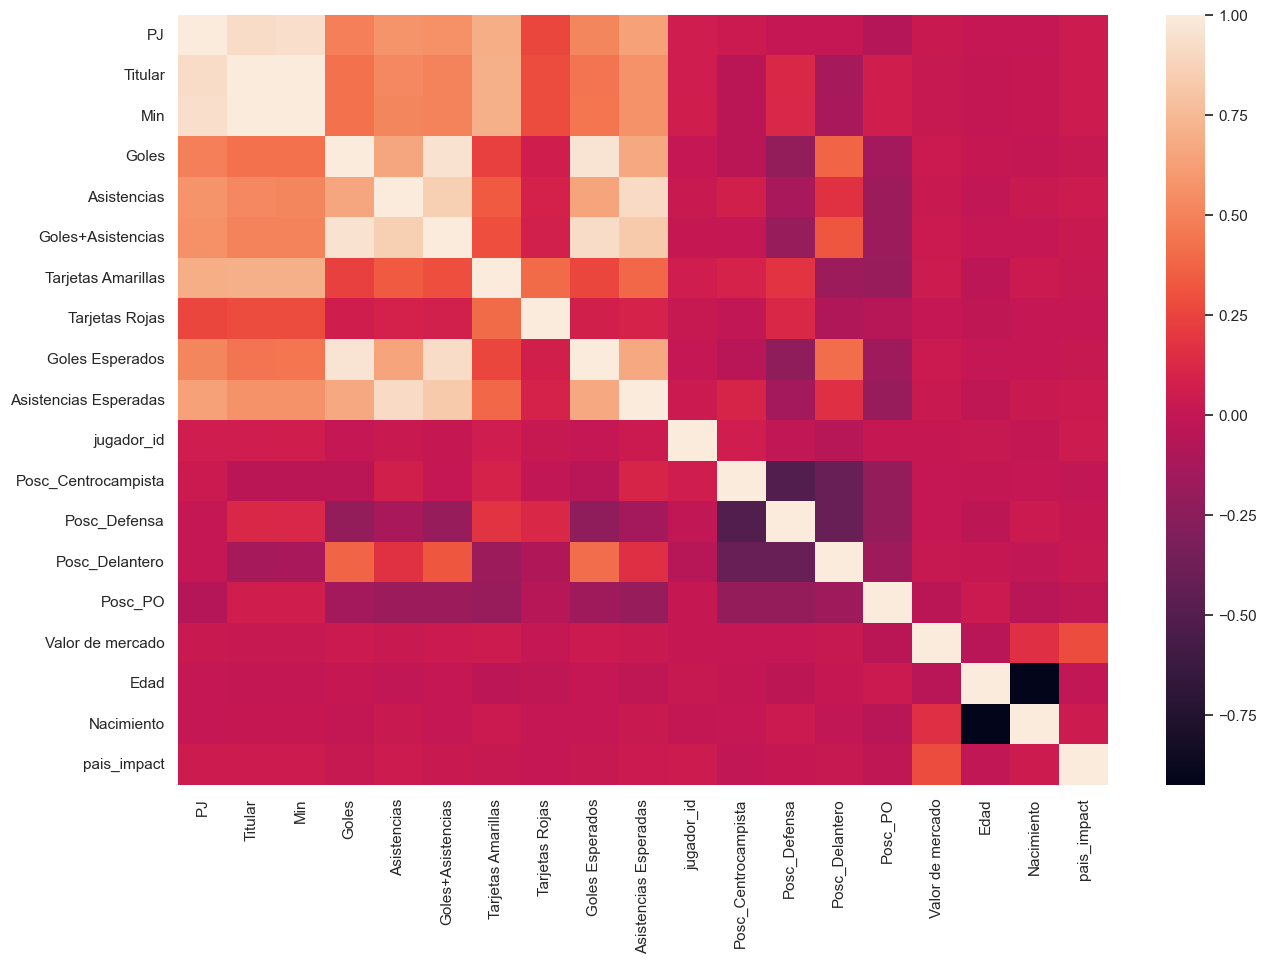

In [33]:
# ahora que todo nuestro dataframe es numerico, hacemos un heatmap para ver la correlacion

plt.figure(figsize=(15, 10))   # 150x100 pixeles

sns.set(style='white')    # estilo blanco

mask=np.triu(np.ones_like(train_final.corr(), dtype=bool))    # mascara para tapar lo de arriba

cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de  colores


sns.heatmap(train_final.corr());

## Hacemos el modelo



In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

import math

In [ ]:
def model_test(X_train, y_train, X_test, y_test):
    models = {
        "linear_regression": LinearRegression(),
        "ridge_regression": Ridge(),
        "lasso_regression": Lasso(),
        "decision_tree_regressor": DecisionTreeRegressor(),
        "random_forest_regressor": RandomForestRegressor(n_estimators=100),
        "gradient_boosting_regressor": GradientBoostingRegressor(n_estimators=100)
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        error = mean_squared_error(y_test, y_pred)
        rmse = math.sqrt(error)

        print(f"Model: {name} - RMSE: {rmse}")

In [ ]:
X = train_final.drop('Valor de mercado', axis=1)
y = train_final['Valor de mercado']

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [ ]:
model_test(X_train, y_train, X_test, y_test)

In [ ]:
modelo = Ridge()
modelo.fit(X_train, y_train)

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
valor = pd.DataFrame(y_pred)
valor.head()

In [ ]:
valor.shape